In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('body.csv', dtype={'stop_name': 'str','daytime_routes': 'str','division':'str','line':'str','complex_id':'str'})

In [3]:
data

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-21,9116.0,10446.0
159529,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-22,9225.0,10445.0
159530,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-23,9361.0,8109.0
159531,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068633,40.730304,R552,2020-12-24,7652.0,6975.0


# Data Cleansing 

In [4]:
data.isnull()

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
159528,False,True,False,True,True,True,False,False,False,False,False,False
159529,False,True,False,True,True,True,False,False,False,False,False,False
159530,False,True,False,True,True,True,False,False,False,False,False,False
159531,False,True,False,True,True,True,False,False,False,False,False,False


In [5]:
data.isnull().sum()

stop_name          116
daytime_routes    6236
division           116
line              6236
borough           6236
structure         6236
gtfs_longitude     116
gtfs_latitude      116
complex_id           0
date                 0
entries             23
exits               23
dtype: int64

In [6]:
cd = data.dropna()
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


In [7]:
cd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
153292    False
153293    False
153294    False
153295    False
153296    False
Length: 153277, dtype: bool

In [8]:
cd.duplicated().sum()

0

In [9]:
cd.stop_name=cd.stop_name.str.replace('-','').fillna(cd.stop_name)

In [10]:
cd.describe()

,gtfs_longitude,gtfs_latitude,entries,exits
count,153277.000000,153277.000000,153277.000000,153277.000000
mean,-73.933276,40.729674,4034.546494,3700.433111
std,0.057345,0.080119,8155.785614,7727.061295
min,-74.074835,40.576127,0.000000,0.000000
25%,-73.980305,40.674772,935.000000,808.000000
50%,-73.944890,40.718331,1923.000000,1759.000000
75%,-73.897174,40.791642,4051.000000,3682.000000
max,-73.755405,40.903125,197283.000000,186847.000000


In [11]:
cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


# Detecting Outliers Using Percentile

<AxesSubplot:xlabel='entries'>

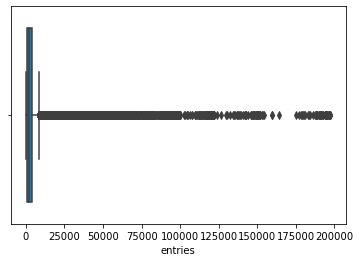

In [13]:
sns.boxplot(cd['entries'])

<AxesSubplot:xlabel='entries', ylabel='Density'>

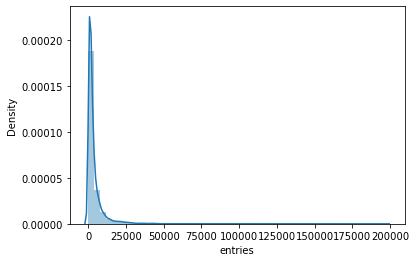

In [14]:
sns.distplot(cd['entries'])

In [18]:
# Finding out the lower limit and upper limit. 
upper_limit = cd['entries'].quantile(0.99)
upper_limit

33886.95999999996

In [17]:
lower_limit = cd['entries'].quantile(0.01)
lower_limit

26.75999999999999

In [19]:
new_cd = cd[(cd['entries'] <= 33886.95) & (cd['entries'] >= 26.75)]

In [20]:
new_cd

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153292,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-21,1771.0,1842.0
153293,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-22,1775.0,1783.0
153294,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-23,1767.0,1860.0
153295,Lorimer St,J M,BMT,Jamaica,Bk,Elevated,-73.947408,40.703869,99,2020-12-24,1465.0,1545.0


<AxesSubplot:xlabel='entries', ylabel='Density'>

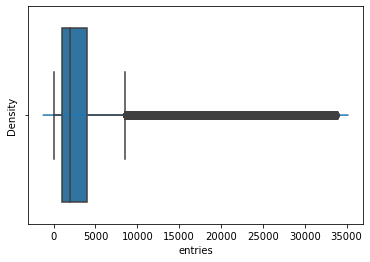

In [21]:
sns.boxplot(new_cd['entries'])

<AxesSubplot:xlabel='entries', ylabel='Density'>

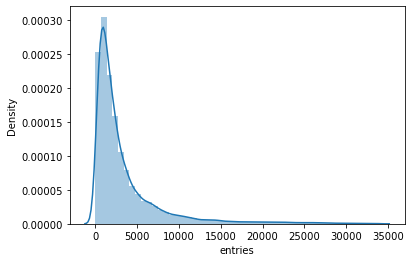

In [23]:
sns.distplot(new_cd['entries'])

In [25]:
# Capping (Winsorization)
# remove the outliers using capping, then that particular method is known as Winsorization.
cd['entries'] = np.where(cd['entries'] >= upper_limit,
        upper_limit,
        np.where(cd['entries'] <= lower_limit,
        lower_limit,
        cd['entries']))

<AxesSubplot:xlabel='entries', ylabel='Density'>

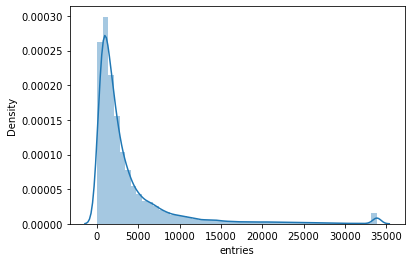

In [27]:
sns.distplot(cd['entries'])

<AxesSubplot:xlabel='entries'>

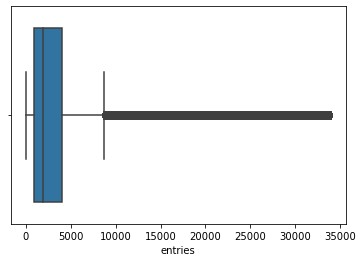

In [28]:
sns.boxplot(cd['entries'])